**1. Utilities (mathematical tools like auto-diff and integration)**

In [46]:
import utilities_q2

**2. PINN for beam problem**

In [47]:
import physics_informed_q2
import numpy as np
import torch
import matplotlib.pyplot as plt

**3. Analytical Solution**

In [48]:
u_a = lambda x: (-1/24)*(x**2)*((x-1)**2)

**4. Defining parameters**

In [49]:
E = lambda x: 1
A = lambda x: 1
L = 1
u0 = [0,0] # Dirichlet boundary conditions for both ends
u1 = [0,0] # Neuman boundary condtions for both ends 
distLoad = 1

**5. Generate neural network**

In [50]:
pinnModel = PhysicsInformedBarModel(E, A, L, u0, u1, dist_load=distLoad)

check 2


**6. Training model**

In [51]:
epochs = 500
learningRate = 1e-2

pinnModel.train(epochs, optimizer='LBFGS', lr=learningRate)

Epoch: 0/499		Differential equation loss = 72.444069		Boundary condition loss = 0.158896		Total loss = 72.602966
Epoch: 100/499		Differential equation loss = 0.000173		Boundary condition loss = 0.000647		Total loss = 0.000820
Epoch: 200/499		Differential equation loss = 0.000067		Boundary condition loss = 0.000304		Total loss = 0.000371
Epoch: 300/499		Differential equation loss = 0.000114		Boundary condition loss = 0.000008		Total loss = 0.000122
Epoch: 400/499		Differential equation loss = 0.000058		Boundary condition loss = 0.000001		Total loss = 0.000060
Epoch: 499/499		Differential equation loss = 0.000058		Boundary condition loss = 0.000001		Total loss = 0.000060


**7. Generating samples**

In [52]:
samples = 100
x_test = utilities_q2.generate_grid_1d(L, samples)
u_test = pinnModel.get_displacements(x_test)

**8. Prediction plot and test plots**

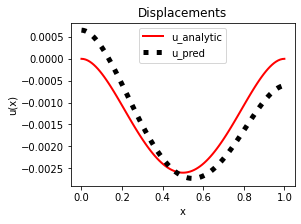

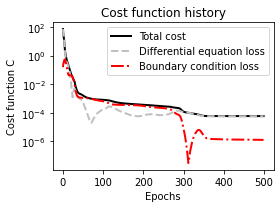

In [53]:
utilities_q2.plot_displacements_bar(x_test, u_test, u_a)
pinnModel.plot_training_history()